In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel file
file_path = 'GeneralAviationDashboard_Data_20221208_Public.xlsx'
sheet_name = 'Accidents'

# Read the data from the "Accidents" sheet
try:
    accidents_df = pd.read_excel(file_path, sheet_name=sheet_name)
    read_success = True
except Exception as e:
    read_success = False
    error_message = str(e)
    
read_success, accidents_df.head() if read_success else print(error_message)

# Total in Alaska
totalAccidentsAlaska = accidents_df[accidents_df['StateOrRegion'] == 'Alaska']
# Fatal injuries only
fatalAccidentsAlaska = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & (accidents_df['InjuryLevel'] == 'Fatal')]
# Nonfatal only
nonfatalAccidentsAlaska = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & (accidents_df['InjuryLevel'] == 'Non-Fatal')]
# Fatal or serious injuries only
fatalSeriousAccidentsAlaska = accidents_df[(accidents_df['StateOrRegion'] == 'Alaska') & ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

print(f"Total accidents in Alaska: {len(totalAccidentsAlaska)}")
print(f"Total fatal accidents in Alaska: {len(fatalAccidentsAlaska)}")
print(f"Total nonfatal accidents in Alaska: {len(nonfatalAccidentsAlaska)}")
print(f"Total accidents in Alaska involving serious or fatal injuries: {len(fatalSeriousAccidentsAlaska)}")


print('Date range: 2012 - 2021')

# Total in Lower 48
totalAccidentsUS = accidents_df[(accidents_df['Country'] == 'United States') & (accidents_df['StateOrRegion'] != 'Alaska') & (accidents_df['StateOrRegion'] != 'Hawaii')]
# Fatal injuries only
fatalAccidentsUS = accidents_df[((accidents_df['Country'] == 'United States') & (accidents_df['StateOrRegion'] != 'Alaska') & (accidents_df['StateOrRegion'] != 'Hawaii')) & (accidents_df['InjuryLevel'] == 'Fatal')]
# Nonfatal only
nonfatalAccidentsUS = accidents_df[((accidents_df['Country'] == 'United States') & (accidents_df['StateOrRegion'] != 'Alaska') & (accidents_df['StateOrRegion'] != 'Hawaii')) & (accidents_df['InjuryLevel'] == 'Non-Fatal')]
# Fatal or serious injuries only
fatalSeriousAccidentsUS = accidents_df[((accidents_df['Country'] == 'United States') & (accidents_df['StateOrRegion'] != 'Alaska') & (accidents_df['StateOrRegion'] != 'Hawaii')) & ((accidents_df['FatalInjuries'] > 0) | (accidents_df['SeriousInjuries'] > 0))]

print(f"Total accidents in US: {len(totalAccidentsUS)}")
print(f"Total fatal accidents in US: {len(fatalAccidentsUS)}")
print(f"Total nonfatal accidents in US: {len(nonfatalAccidentsUS)}")
print(f"Total accidents in US involving serious or fatal injuries: {len(fatalSeriousAccidentsUS)}")

Total accidents in Alaska: 703
Total fatal accidents in Alaska: 66
Total nonfatal accidents in Alaska: 637
Total accidents in Alaska involving serious or fatal injuries: 107
Date range: 2012 - 2021
Total accidents in US: 11384
Total fatal accidents in US: 2070
Total nonfatal accidents in US: 9314
Total accidents in US involving serious or fatal injuries: 3411


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


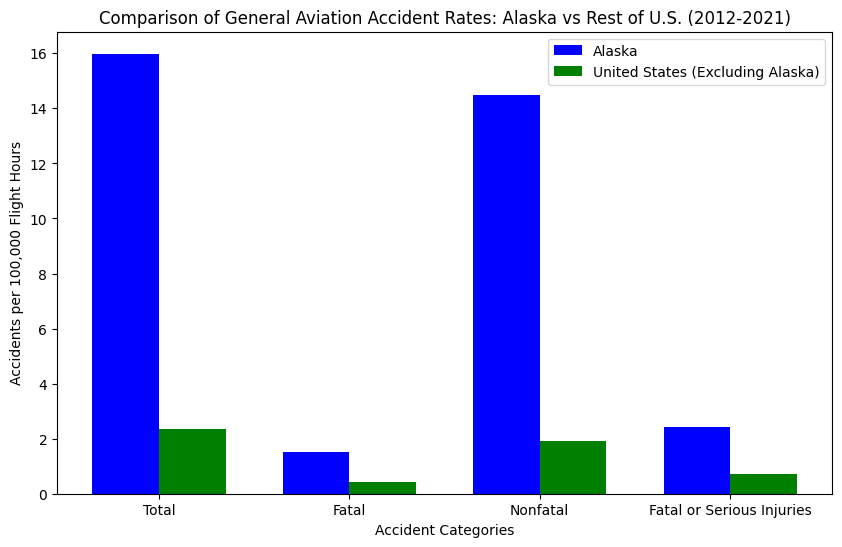

In [16]:
import pandas as pd

# File paths for the documents (adjust these file paths to match your files)
file_paths = {
    2012: './Survey Data/2012.xls',
    2013: './Survey Data/2013.xlsx',
    2014: './Survey Data/2014.xlsx',
    2015: './Survey Data/2015.xlsx',
    2016: './Survey Data/2016.xlsx',
    2017: './Survey Data/2017.xlsx',
    2018: './Survey Data/2018.xlsx',
    2019: './Survey Data/2019.xlsx',
    2020: './Survey Data/2020.xlsx',
    2021: './Survey Data/2021.xlsx'
}

# Initialize sums
total_hours_flown_alaskan = 0
total_hours_flown_non_alaskan = 0

# Process files for 2012 to 2015
for year in range(2012, 2016):
    file_path = file_paths[year]
    data = pd.read_excel(file_path, sheet_name='2.2', skiprows=13)
    data = data.iloc[:, [0, 4, 10]]  # Assuming columns E and K contain the relevant data
    data.columns = ['Region', 'Estimated Number Active', 'Estimated Total Hours Flown']
    data = data.dropna(subset=['Region'])
    data[['Estimated Number Active', 'Estimated Total Hours Flown']] = data[['Estimated Number Active', 'Estimated Total Hours Flown']].apply(pd.to_numeric, errors='coerce')

    # Summing up for each region
    alaskan_data = data[data['Region'] == 'Alaskan']
    total_hours_flown_alaskan += alaskan_data['Estimated Total Hours Flown'].sum()
    non_alaskan_data = data[data['Region'] != 'Alaskan']
    # non_alaskan_data = data[(data['Region'] != 'Alaskan') & (data['Region'] != 'Western-Pacific')]
    total_hours_flown_non_alaskan += non_alaskan_data['Estimated Total Hours Flown'].sum()

# Initialize sums for the adjusted approach
total_hours_flown_alaskan_adj = 0
total_hours_flown_non_alaskan_adj = 0

# Process files for 2016 to 2021 with the adjusted format
for year in range(2016, 2022):
    file_path = file_paths[year]
    # Reading data with the correct header row and extracting relevant columns
    data_adj = pd.read_excel(file_path, sheet_name='2.2', header=1)
    data_adj = data_adj[['REGION', 'Estimated Number Active', 'Estimated Total Hours Flown']]

    # Converting the relevant columns to numeric
    data_adj[['Estimated Number Active', 'Estimated Total Hours Flown']] = data_adj[['Estimated Number Active', 'Estimated Total Hours Flown']].apply(pd.to_numeric, errors='coerce')

    # Summing up for Alaskan and non-Alaskan regions
    alaskan_data_adj = data_adj[data_adj['REGION'] == 'Alaskan']
    total_hours_flown_alaskan_adj += alaskan_data_adj['Estimated Total Hours Flown'].sum()

    non_alaskan_data_adj = data_adj[data_adj['REGION'] != 'Alaskan']
    # non_alaskan_data_adj = data_adj[(data_adj['REGION'] != 'Alaskan') & (data['Region'] != 'Western-Pacific')]
    total_hours_flown_non_alaskan_adj += non_alaskan_data_adj['Estimated Total Hours Flown'].sum()

# Combining the results from 2012 to 2015 with 2016 to 2021
total_hours_flown_alaskan_combined = total_hours_flown_alaskan + total_hours_flown_alaskan_adj
total_hours_flown_non_alaskan_combined = total_hours_flown_non_alaskan + total_hours_flown_non_alaskan_adj
# Provided accident numbers
totalAccidentsAlaska = 703
fatalAccidentsAlaska = 66
nonfatalAccidentsAlaska = 637
fatalSeriousAccidentsAlaska = 107
totalAccidentsUS = 11384
fatalAccidentsUS = 2070
nonfatalAccidentsUS = 9314
fatalSeriousAccidentsUS = 3411

# Calculating the accident rates per 100,000 hours flown
# Alaska
accident_rate_total_alaska = (totalAccidentsAlaska / total_hours_flown_alaskan_combined) * 100000
accident_rate_fatal_alaska = (fatalAccidentsAlaska / total_hours_flown_alaskan_combined) * 100000
accident_rate_nonfatal_alaska = (nonfatalAccidentsAlaska / total_hours_flown_alaskan_combined) * 100000
accident_rate_fatal_serious_alaska = (fatalSeriousAccidentsAlaska / total_hours_flown_alaskan_combined) * 100000

# US excluding Alaska
total_hours_flown_us_excluding_alaska = total_hours_flown_non_alaskan_combined
accident_rate_total_us = (totalAccidentsUS / total_hours_flown_us_excluding_alaska) * 100000
accident_rate_fatal_us = (fatalAccidentsUS / total_hours_flown_us_excluding_alaska) * 100000
accident_rate_nonfatal_us = (nonfatalAccidentsUS / total_hours_flown_us_excluding_alaska) * 100000
accident_rate_fatal_serious_us = (fatalSeriousAccidentsUS / total_hours_flown_us_excluding_alaska) * 100000

# Accident rate data
categories = ['Total', 'Fatal', 'Nonfatal', 'Fatal or Serious Injuries']
alaskan_rates = [accident_rate_total_alaska, accident_rate_fatal_alaska, accident_rate_nonfatal_alaska, accident_rate_fatal_serious_alaska]
non_alaskan_rates = [accident_rate_total_us, accident_rate_fatal_us, accident_rate_nonfatal_us, accident_rate_fatal_serious_us]

# Setting the positions and width for the bars
pos = np.arange(len(categories))
bar_width = 0.35

# Plotting the bars
plt.figure(figsize=(10, 6))
bar1 = plt.bar(pos, alaskan_rates, bar_width, label='Alaska', color='blue')
bar2 = plt.bar(pos + bar_width, non_alaskan_rates, bar_width, label='United States (Excluding Alaska)', color='green')

# Adding labels and title
plt.xlabel('Accident Categories')
plt.ylabel('Accidents per 100,000 Flight Hours')
plt.title('Comparison of General Aviation Accident Rates: Alaska vs Rest of U.S. (2012-2021)')
plt.xticks(pos + bar_width / 2, categories)
plt.legend()

# Displaying the bar chart
plt.show()
